# Remove Overlap
* It will take max pixels from overlapping mask instances hence there will be less chance of pixel loss
* You can try it with as many as possible mask instances. 
* You can also run it with **GPU** with `cupy`

## Notebook
* Train: [Sartorius: MMDetection [Train]](https://www.kaggle.com/awsaf49/sartorius-mmdetection-train)
* Infer: [Sartorius: MMDetection [Infer]](https://www.kaggle.com/awsaf49/sartorius-mmdetection-infer) `LB: 0.265`


Please **do upvote** if you find this useful.

# Install Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Helper Function

In [2]:
def check_overlap(msk):
    msk = msk.astype(np.bool).astype(np.uint8)
    return np.any(np.sum(msk, axis=-1)>1)

def fix_overlap(msk):
    """
    Args:
        mask: multi-channel mask, each channel is an instance of cell, shape:(520,704,None)
    Returns:
        multi-channel mask with non-overlapping values, shape:(520,704,None)
    """
    msk = np.array(msk)
    msk = np.pad(msk, [[0,0],[0,0],[1,0]])
    ins_len = msk.shape[-1]
    msk = np.argmax(msk,axis=-1)
    msk = tf.keras.utils.to_categorical(msk, num_classes=ins_len)
    msk = msk[...,1:]
    msk = msk[...,np.any(msk, axis=(0,1))]
    return msk

# Example

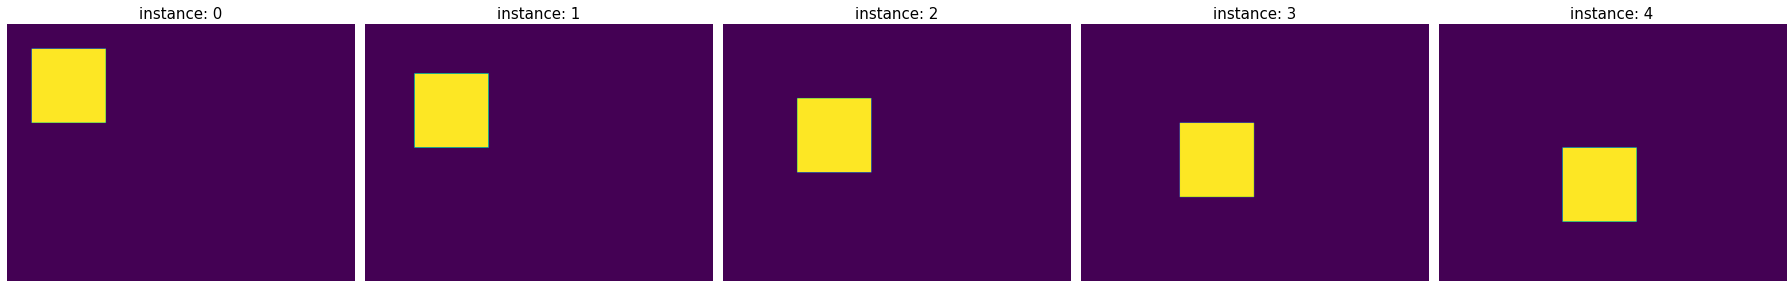

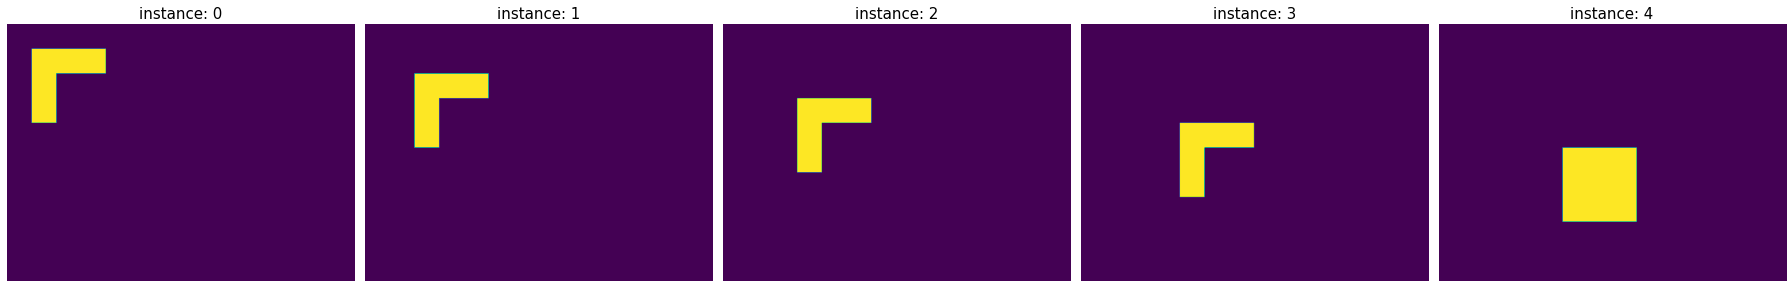

In [3]:
mask = np.zeros((520, 704, 5))

# Before Fix
plt.figure(figsize=(5*5, 5))
for idx in range(5):
    mask[idx*50+50:(idx*50+200), idx*50+50:(idx*50+200), idx] = idx+1 # probabilistic mask isntead of binary mask
    plt.subplot(1, 5, idx+1)
    plt.imshow(mask[...,idx]);
    plt.axis('OFF')
    plt.title(f'instance: {idx}', fontsize=15)
plt.tight_layout()
plt.show()

## After Fix
plt.figure(figsize=(5*5, 5))
fixed_mask = fix_overlap(mask)
for idx in range(5):
    plt.subplot(1, 5, idx+1)
    plt.imshow(fixed_mask[...,idx]);
    plt.axis('OFF')
    plt.title(f'instance: {idx}', fontsize=15)
plt.tight_layout()
plt.show()

# Fix Mask

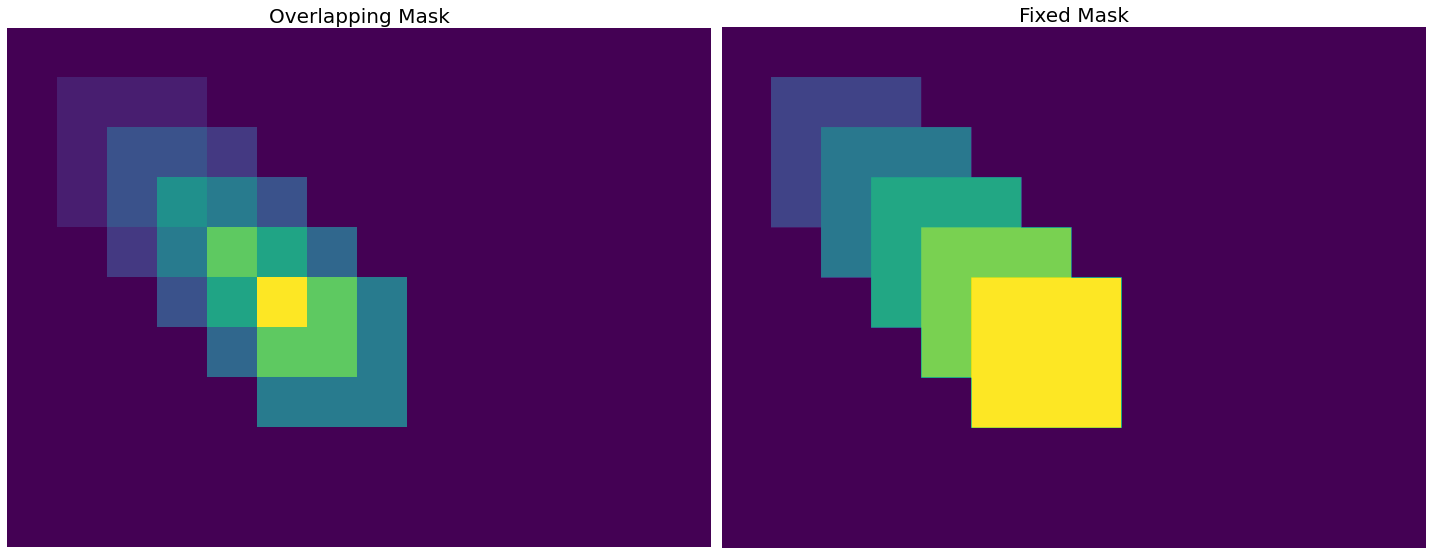

In [4]:
plt.figure(figsize=(2*10, 10))
overlap_mask = np.sum(mask, axis=-1)
plt.subplot(1, 2, 1); 
plt.imshow(overlap_mask); plt.title('Overlapping Mask', fontsize=20); plt.axis('OFF')

plt.subplot(1, 2, 2); 
fixed_mask = fix_overlap(mask)
fixed_mask = np.pad(fixed_mask, [[0,0],[0,0],[1,0]]) # to plot first channel, otherwise it'll mix with background(0)
fixed_mask = np.argmax(fixed_mask, axis=-1)[...,1:]
plt.imshow(fixed_mask); plt.title('Fixed Mask', fontsize=20); plt.axis('OFF')
plt.tight_layout()
plt.savefig('remove-mask.png',dpi=600);
plt.show();

# Check Overlap

In [5]:
print(f'Mask       - Overlap: {check_overlap(mask)}')
print(f'Fixed_Mask - Overlap: {check_overlap(fix_overlap(mask))}')

Mask       - Overlap: True
Fixed_Mask - Overlap: False
